In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import glob
import re
import sys

sys.path.append(
    "/home/Marc/neuromics/Marc_Internship"
)  # path to the code with the functions

In [7]:
data_path = "../data/Data03_p2_MultipleRuns/"
ALL_PYR = list(range(800))
ALL_BWB = list(range(800, 1000))
ALL_OLM = list(range(1000, 1200))

my_runs = [f"{r:.1f}" for r in np.arange(1.0, -0.1, -0.1)]


def load(data_path):
    folders = glob.glob(f"{data_path}/*/")
    data = {}
    for folder in folders:
        name = folder.split("/")[-2].split("_")[0]
        data[name] = {}
        for file in glob.glob(f"{folder}/*.pkl"):
            pattern = r"(\d+)"
            match = re.search(pattern, file.split("/")[-1])
            run = match.group(1)
            with open(file, "rb") as f:
                data[name][run] = pickle.load(f)
            print("Loaded:", file)
    return data


data = load(data_path)

Loaded: /home/Marc/Documents/internship/python_analysis/data/Data03_p2_MultipleRuns_CustomOutput/0.2_1.8/04.pkl
Loaded: /home/Marc/Documents/internship/python_analysis/data/Data03_p2_MultipleRuns_CustomOutput/0.2_1.8/18.pkl
Loaded: /home/Marc/Documents/internship/python_analysis/data/Data03_p2_MultipleRuns_CustomOutput/0.2_1.8/05.pkl
Loaded: /home/Marc/Documents/internship/python_analysis/data/Data03_p2_MultipleRuns_CustomOutput/0.2_1.8/13.pkl
Loaded: /home/Marc/Documents/internship/python_analysis/data/Data03_p2_MultipleRuns_CustomOutput/0.2_1.8/02.pkl
Loaded: /home/Marc/Documents/internship/python_analysis/data/Data03_p2_MultipleRuns_CustomOutput/0.2_1.8/10.pkl
Loaded: /home/Marc/Documents/internship/python_analysis/data/Data03_p2_MultipleRuns_CustomOutput/0.2_1.8/17.pkl
Loaded: /home/Marc/Documents/internship/python_analysis/data/Data03_p2_MultipleRuns_CustomOutput/0.2_1.8/09.pkl
Loaded: /home/Marc/Documents/internship/python_analysis/data/Data03_p2_MultipleRuns_CustomOutput/0.2_1.8

In [8]:
# Data structure with many runs and trials for each run
print(data.keys())
print(data["0.2"].keys())
print(data["0.2"]["00"].keys())

dict_keys(['0.2', '0.4', '0.9', '0.7', '0.8', '0.6', '1.0', '0.1', '0.0', '0.3', '0.5'])
dict_keys(['04', '18', '05', '13', '02', '10', '17', '09', '16', '06', '19', '07', '12', '01', '14', '11', '00', '03', '08', '15'])
dict_keys(['netParams', 'simData'])


In [9]:
from src.SanjayCode import plot_psd
from src.SanjayCode import get_theta_gamma_power

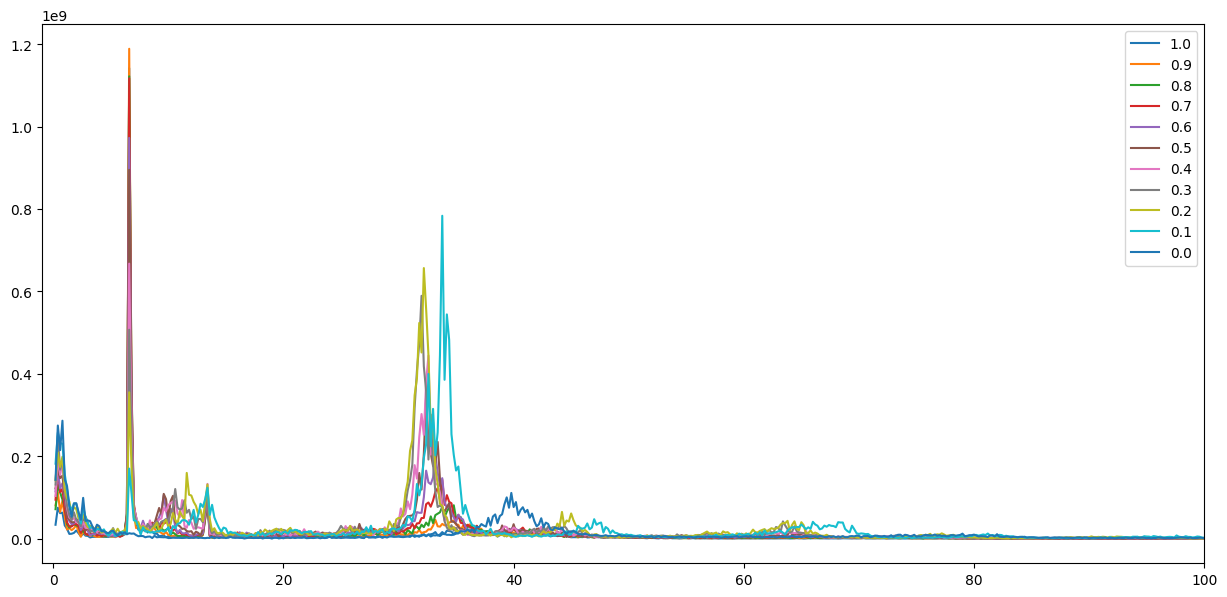

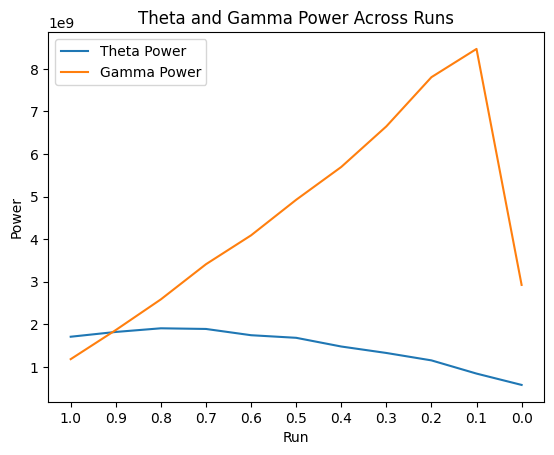

In [10]:
# Assuming you have already loaded your data and defined my_runs
psds, xfs = plot_psd(data, my_runs)
plt.show()

tfs, gfs = get_theta_gamma_power(psds, xfs, my_runs)
plt.plot(my_runs, tfs, label="Theta Power")
plt.plot(my_runs, gfs, label="Gamma Power")
plt.xlabel("Run")
plt.ylabel("Power")
plt.title("Theta and Gamma Power Across Runs")
plt.legend()
plt.show()